In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lb

In [13]:
SOURCE = "/Users/pm/AcaHub/AudioSamples/carrier2244100.wav"
TARGET = "/Users/pm/AcaHub/AudioSamples/modulator2244100.wav"

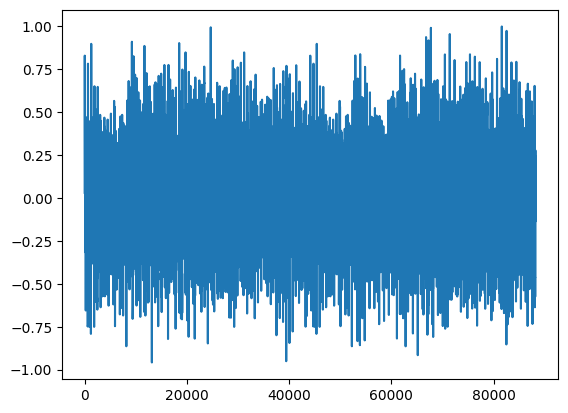

In [60]:
sig, _ = lb.load(SOURCE, sr=44100)
sig = sig[:88200]
target, _ = lb.load(TARGET, sr=44100)
target = target[:88200]
plt.plot(sig)
plt.show()

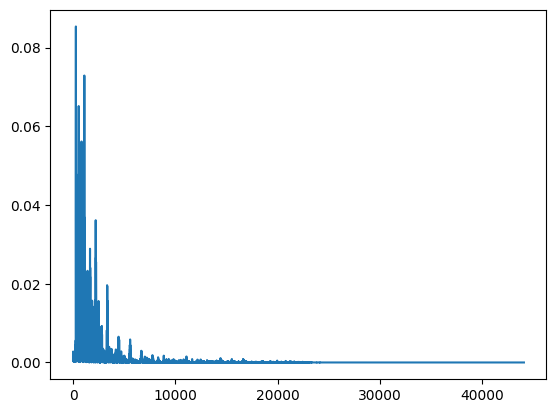

In [61]:
source_fft = np.fft.rfft(sig)
mag = np.abs(source_fft)

plt.plot(mag / len(mag))
plt.show()

In [62]:
def get_spectral_envelope(data: list[float], cf: int) -> list[float]:
    source_fft = np.fft.rfft(data)
    mag = np.abs(source_fft)
    source_log = np.log(mag)
    ifft_log = np.fft.irfft(source_log)

    win = np.zeros_like(ifft_log)
    for i in range(len(ifft_log)):
        if i < cf: win[i] = 1.0
        if i == cf: win[i] = 0.5
        if i > cf : win[i] = 0.0 

    ifft_log_real = ifft_log.real * win
    real_cep = np.fft.rfft(ifft_log_real).real
    real_cep -= np.mean(real_cep)
    real_linear_cep = np.exp(real_cep)
    factor = np.max(mag) / np.max(real_linear_cep)
    real_linear_cep *= factor
    return real_linear_cep

def cross_spectrum(carrier: list[float], modulator: list[float], cf: int) -> list[float]:
    source_cep = get_spectral_envelope(modulator, cf)
    target_cep = get_spectral_envelope(carrier, cf)   
    target_fft = np.fft.rfft(carrier)
    target_fft /= target_cep
    morphed = target_fft * source_cep
    morphed = np.fft.irfft(morphed)
    return morphed

In [63]:
m = cross_spectrum(target, sig, 20000)

In [64]:
from IPython.display import Audio

Audio(m, rate=44100)

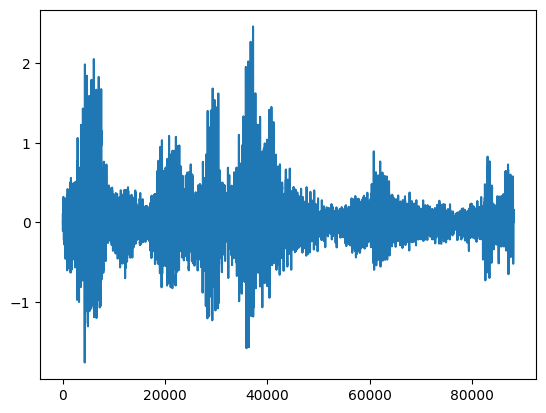

In [65]:
plt.plot(m)
plt.show()